# 01_FILTERING — Image Filtering
**Nama:** Versa Syahputra  
**NIM:** 23525041

## 🎯 Tujuan
Filtering berguna untuk memberikan efek smoothing pada citra sekaligus mengurangi noise. 
Tahap ini menerapkan dua metode filtering berbeda pada citra yaitu **Gaussian Filter** dan **Median Filter**.


## 🧠 Teori Filtering & Parameter

### Gaussian Filter
Gaussian filter merupakan filter linear yang menggunakan fungsi distribusi Gaussian sebagai kernel. Tujuannya adalah menghaluskan citra dan mengurangi noise frekuensi tinggi.  
Parameter utama:
- `sigma (σ)`: standar deviasi distribusi Gaussian, mengontrol tingkat blur.
- `kernel_size`: ukuran jendela filter.

> Catatan: Gaussian Filter pada module opencv `cv2` dapat mengatur sigma untuk tiap axis `x,y` yang berbeda, dengan parameter `sigmaX` dan `sigmaY`. Namun jika `sigmaY` tidak diberikan maka `sigmaY = sigmaX`

### Median Filter
Median filter adalah filter **non-linear** yang mengganti setiap piksel dengan nilai median dari area sekitarnya. Cocok untuk menghilangkan **salt-and-pepper noise** tanpa terlalu mengaburkan tepi citra.  
Parameter utama:
- `disk_size`: radius area yang digunakan untuk menghitung median.


## Implementasi Filtering

### Fungsi pendukung dan import module

In [20]:
import numpy as np
from skimage import data, filters, color
from skimage.filters import median
from skimage.morphology import disk
import matplotlib.pyplot as plt
import cv2

def show_images(gray: np.ndarray, color: np.ndarray, title: str) -> None:
    """Menampilkan gambar grayscale dan gambar berwarna secara berdampingan.

    Args:
        gray (np.ndarray): Gambar grayscale.
        color (np.ndarray): Gambar berwarna.
        title (str): Judul untuk plot.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(gray, cmap='gray')
    axes[0].set_title('Grayscale Image')
    axes[0].axis('off')

    axes[1].imshow(color)
    axes[1].set_title("Color Image")
    axes[1].axis('off')
    fig.suptitle(title)

    plt.show()

### Dataset citra
Menggunakan 2 jenis gambar untuk implementasi filtering
- `camera` untuk gambar _grayscale_
- `astronaut` untuk gambar berwarna

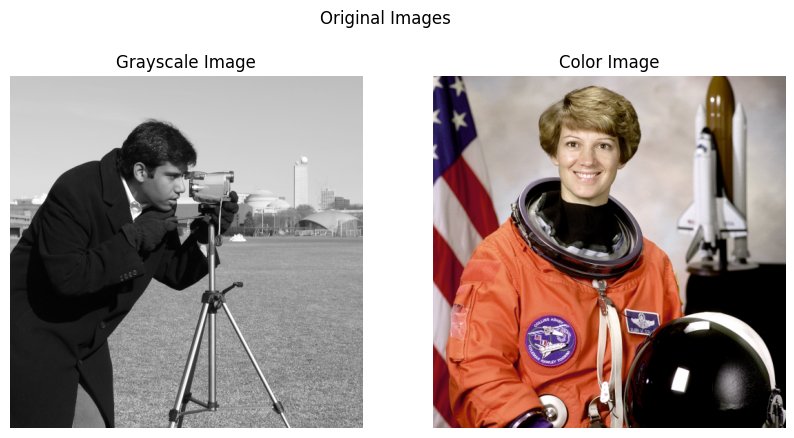

In [ ]:
gray_img = data.camera()
color_img = data.astronaut()

show_images(gray_img, color_img, "Original Images")


### Implementasi Gaussian Filter

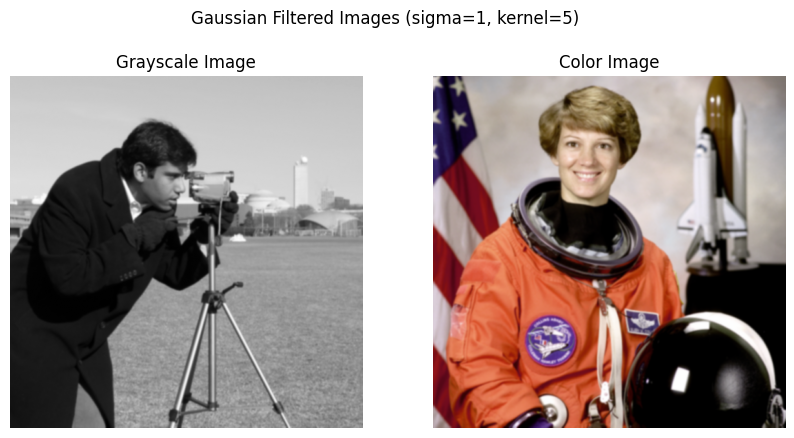

In [13]:
kernel_size = 5
gauss_gray = cv2.GaussianBlur(gray_img, (kernel_size, kernel_size), sigmaX=1)
gauss_color = cv2.GaussianBlur(color_img, (kernel_size, kernel_size), sigmaX=1)

show_images(gauss_gray, gauss_color, "Gaussian Filtered Images (sigma=1, kernel=5)")

### Implementasi Median Filter

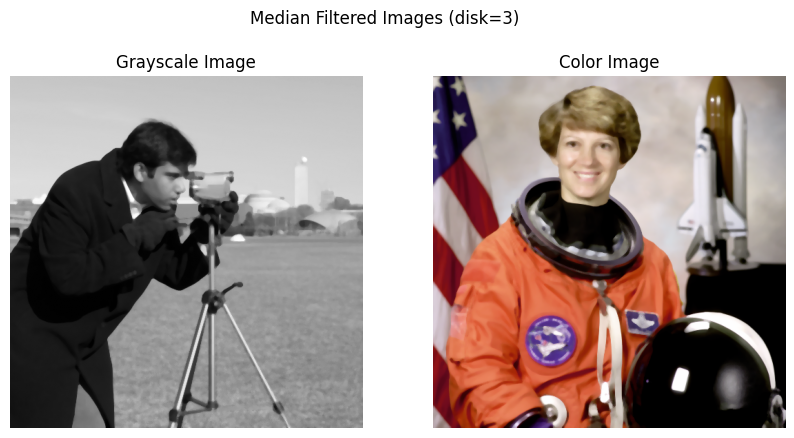

In [11]:
median_gray = median(gray_img, disk(3))

# Untuk gambar berwarna, kita perlu mengaplikasikan median filter pada setiap channel warna secara terpisah
median_color = np.zeros_like(color_img)
for i in range(3):
    median_color[..., i] = median(color_img[..., i], disk(3))

show_images(median_gray, median_color, "Median Filtered Images (disk=3)")

### Eksplorasi parameter

bagian ini berfokus untuk memperlihatkan efek dari variasi parameter pada hasil filtering.

**Tabel parameter uji untuk Gaussian Filter**
<table>
  <tr>
    <th rowspan="1">Parameter</th>
    <th colspan="3">Values</th>
  </tr>
  <tr>
    <td>Sigma</td>
    <td>0.5</td>
    <td>1</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Kernel Size</td>
    <td>3</td>
    <td>5</td>
    <td>7</td>
  </tr>
</table>

**Tabel parameter uji untuk Median Filter**
<table>
  <tr>
    <th rowspan="1">Parameter</th>
    <th colspan="3">Values</th>
  </tr>
  <tr>
    <td>Disk</td>
    <td>1</td>
    <td>3</td>
    <td>5</td>
  </tr>
</table>

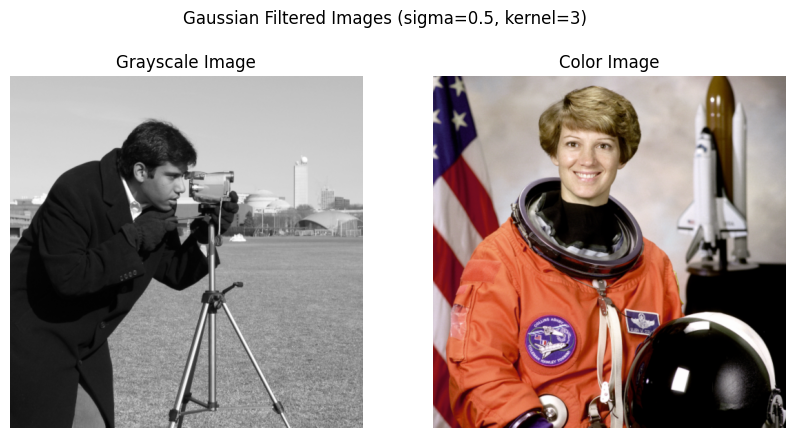

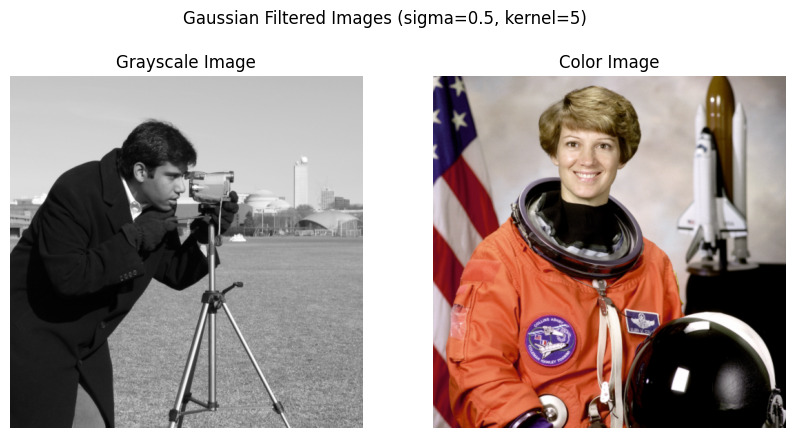

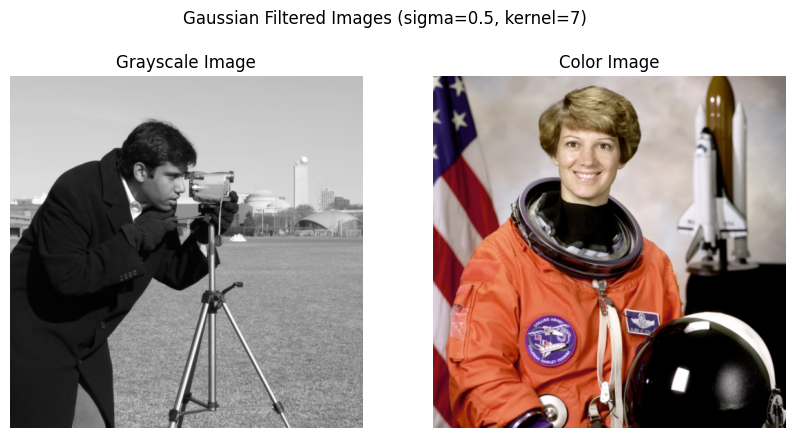

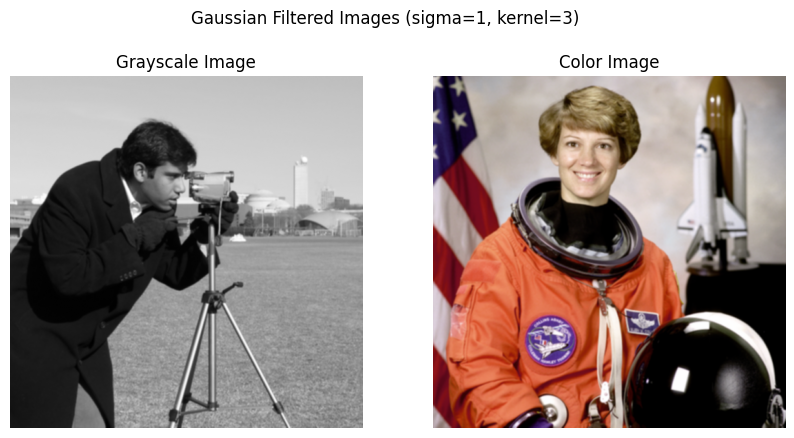

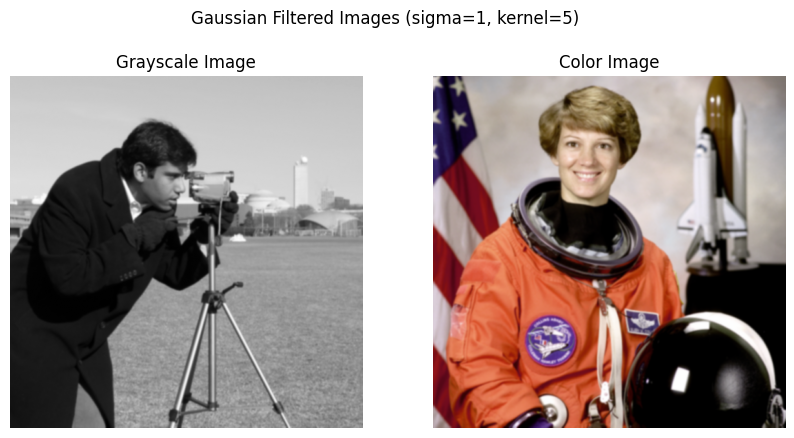

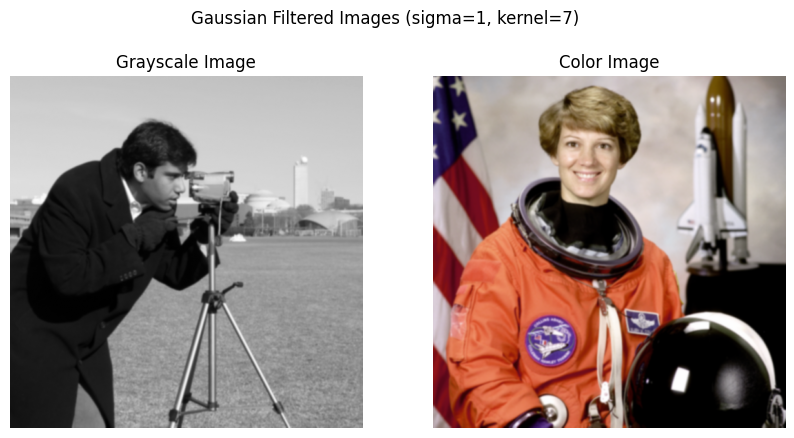

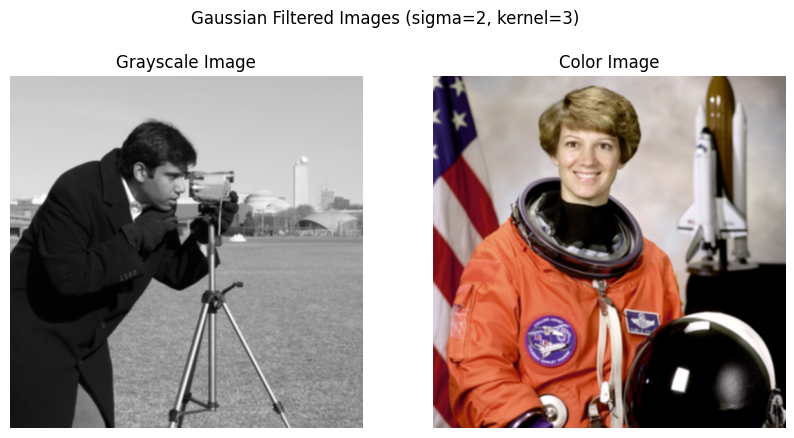

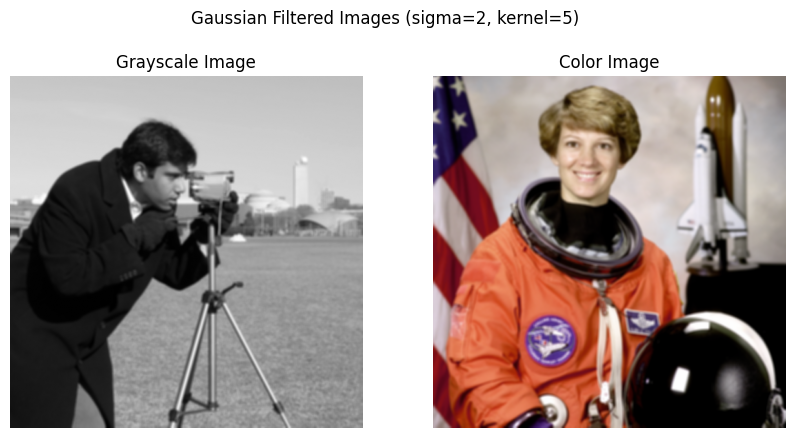

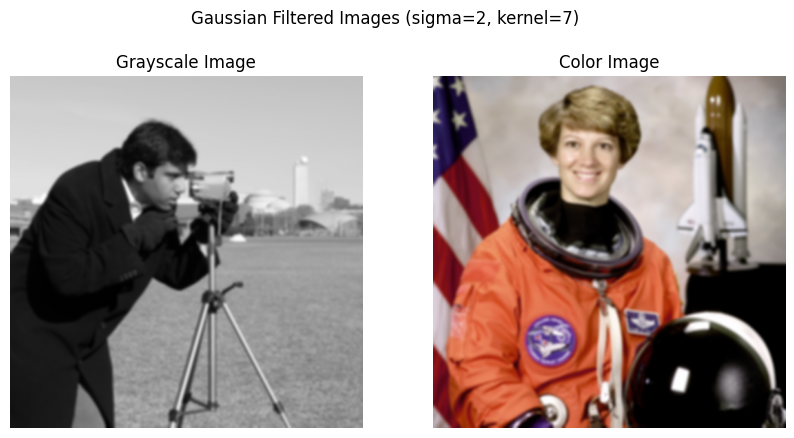

In [19]:
for sigma in [0.5, 1, 2]:
    for ksize in [3, 5, 7]:
        gauss_gray = cv2.GaussianBlur(gray_img, (ksize, ksize), sigmaX=sigma)
        gauss_color = cv2.GaussianBlur(color_img, (ksize, ksize), sigmaX=sigma)
        title = f"Gaussian Filtered Images (sigma={sigma}, kernel={ksize})"
        show_images(gauss_gray, gauss_color, title)

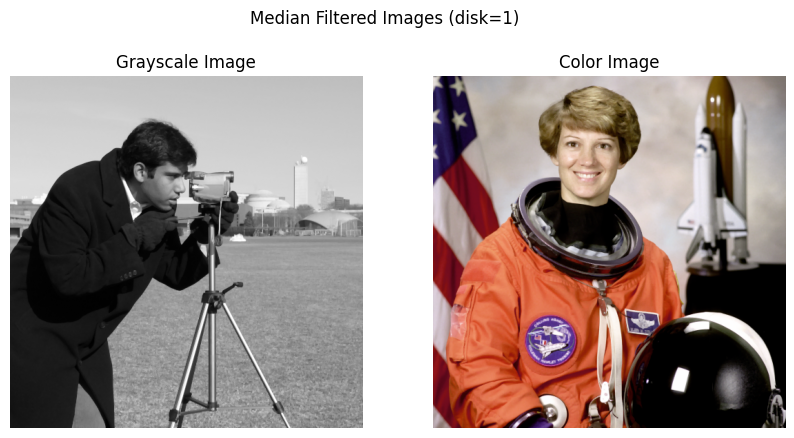

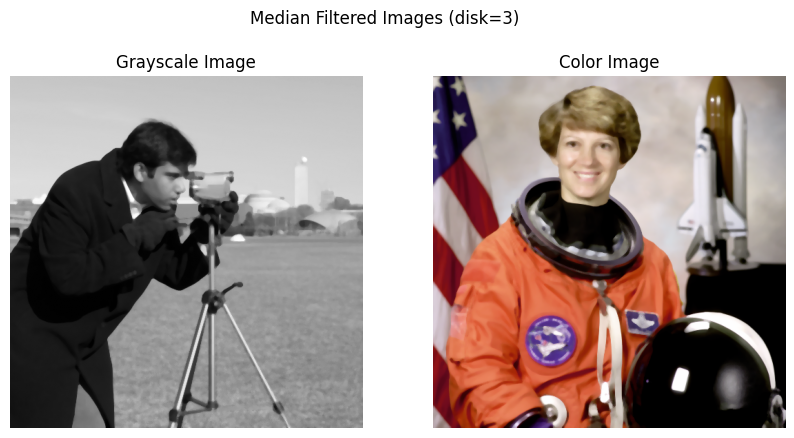

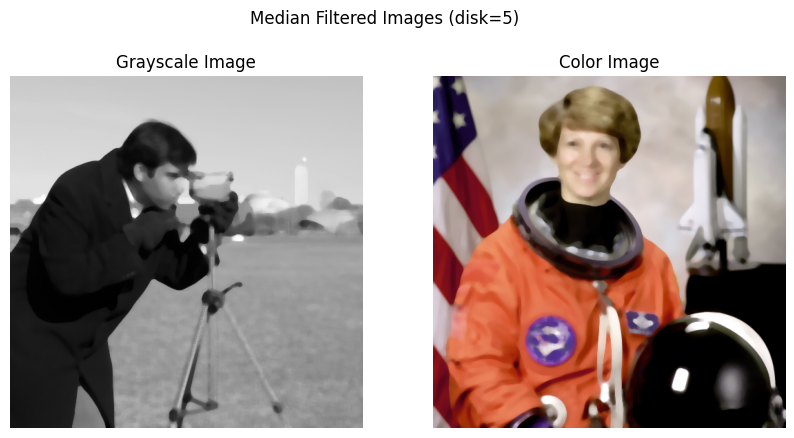

In [21]:
# Eksplorasi parameter Median filter
for disk_size in [1, 3, 5]:
    median_gray = median(gray_img, disk(disk_size))
    
    median_color = np.zeros_like(color_img)
    for i in range(3):
        median_color[..., i] = median(color_img[..., i], disk(disk_size))
    
    title = f"Median Filtered Images (disk={disk_size})"
    show_images(median_gray, median_color, title)

## ✅ Kesimpulan & Analisis

Pada tahap ini, dua metode yang digunakan adalah **Gaussian Filter** dan Median Filter. Keduanya berfungsi untuk menghaluskan citra dan mengurangi noise, namun memiliki karakteristik dan efek yang sedikit berbeda.

**Gaussian Filter** bekerja dengan melakukan konvolusi menggunakan kernel berbobot distribusi Gaussian. Filter ini menghasilkan efek smoothing yang lembut dan merata pada seluruh area gambar. Parameter yang paling berpengaruh adalah sigma (σ) dan ukuran kernel.
Dari hasil percobaan, ketika σ = 0.5 dan kernel size = 3, citra menjadi lebih halus tanpa kehilangan terlalu banyak detail tepi. Namun, ketika nilai sigma atau ukuran kernel diperbesar, gambar menjadi semakin buram karena detail halus ikut tereduksi.

Sementara itu, **Median Filter** bekerja secara non-linear dengan mengganti setiap piksel dengan nilai median dari piksel-piksel di sekitarnya. Pendekatan ini sangat efektif untuk menghilangkan noise bintik hitam putih acak.
Pada percobaan dengan radius (disk) = 1, filter ini berhasil membersihkan noise tanpa mengaburkan tepi secara signifikan. Namun, jika ukuran jendela median terlalu besar, citra juga menjadi terlalu halus, kehilangan tekstur, dan terlalu buram.

Secara umum, kedua metode menunjukkan bahwa:

- Parameter yang terlalu besar menyebabkan gambar menjadi terlalu buram, karena informasi detail ikut tersaring.

- Parameter yang tepat (σ=0.5, kernel=3, disk=1) menghasilkan gambar yang lebih jernih dan bersih, dengan noise berkurang namun detail masih terjaga.

Dengan demikian, baik Gaussian maupun Median filter sama-sama efektif untuk proses denoising, tetapi Median Filter lebih unggul pada noise acak ekstrem, sedangkan Gaussian Filter lebih cocok untuk smoothing halus secara umum.